# Support Vector Machines

## 1. Social Network Ads 

En primer lugar vamos a trabajar con el dataset de Social Networks Ads, un conjunto de datos que permiten determinar si un usuario compró o no un producto en particular. Tanto el dataset como su descripción los pueden encontrar en [Kaggle](https://www.kaggle.com/rakeshrau/social-network-ads).

### Columnas del dataset:
* User ID: identificación de usuario.
* Gender: género.
* Age: edad.
* EstimatedSalary: salario estimado.
* Purchased: compró/no compró un producto en particular.

Ahora sí, a trabajar. En primer lugar, recomendamos hacer una pequeña exploración de datos si tienes tiempo. Luego, sigue los pasos que aquí te dejamos. Si te sientes seguro/a, hasta puedes intentar implementar un SVM sobre ese dataset sin mirar la guía que dejamos. En ese caso, te conviene hacerlo en otro notebook. ¡Inténtalo!

1. Importa las librerías necesarias y carga el dataset.

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import cm

In [90]:
df = pd.read_csv("../datasets/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


2. Sólo vamos a utilizar como features las columnas `Age` y `EstimatedSalary` (así podemos visualizar). Y como target a la columna `Purchased`

In [91]:
X = df[['Age','EstimatedSalary']]
y = df['Purchased']

3. Separa los datos de entrenamiento de los datos de prueba.

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [93]:
X_train.shape, y_test.shape

((268, 2), (132,))

4. Estandariza los datos (`StandardScaler`).

In [94]:
scaler = StandardScaler()

In [95]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.fit_transform(X_test)
XX = scaler.fit_transform(X)

5. Entrena un SVM. Para ello, utiliza la clase `SVC` de la librería Scikit-Learn cuya documentación la puedes encontrar [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [23]:
modelo = SVC()

In [24]:
modelo.fit(X_train_s,y_train)

SVC()

In [25]:
modelo.score(X_train_s,y_train)

0.8917910447761194

In [28]:
modelo.score(X_test_s,y_test)

0.9545454545454546

6. Realiza las predicciones sobre los datos de prueba.

In [31]:
train_predict = modelo.predict(X_train_s)
test_predict = modelo.predict(X_test_s)

7. Visualiza los resultados mediante:
 
* Matriz de confusión (`confusion_matrix`)
* Reporte de clasificación (`classification_report`)
* Gráfico de fronteras de decisión (¡Busca en notebooks anteriores!)

In [33]:
confusion_matrix(y_test,test_predict)

array([[76,  4],
       [ 2, 50]], dtype=int64)

In [36]:
print(classification_report(y_test,test_predict))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        80
           1       0.93      0.96      0.94        52

    accuracy                           0.95       132
   macro avg       0.95      0.96      0.95       132
weighted avg       0.96      0.95      0.95       132



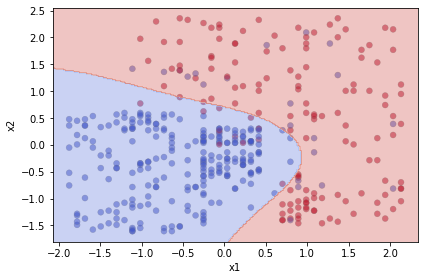

In [45]:
def graficar_fronteras(modelo):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(XX[:,0], XX[:,1], c = y, alpha = 0.5, lw = 0.5, edgecolor = 'grey', cmap =cm.coolwarm)

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                          np.linspace(*ylim, num=200))
    Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap =cm.coolwarm)

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.tight_layout()
    plt.show()

graficar_fronteras(modelo)

**Para probar:**
1. Modifica el `kernel` del clasificador y observar cómo se modifican las fronteras encontradas por el mismo y su performance. Por ejemplo, prueba con con los siguientes kernels: `rbf`, `poly` y `sigmoid`.
2. ¿Cuál es la función del parámetro `Gamma`?
3. Repite el ejercicio 1, modificando los valores de `Gamma`
4. Modifica el parámetro `C` del clasificador y observar cómo se modifican las fronteras encontradas por el clasificador y su performance. ¿Cómo se puede interpretar la acción de `C`? 

Kernel: rbf
Score:  0.9545454545454546


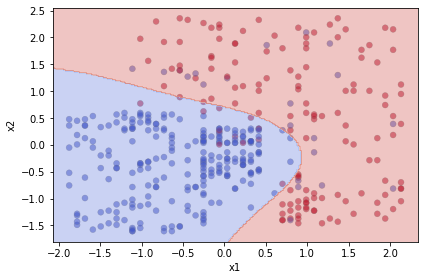

Kernel: poly
Score:  0.803030303030303


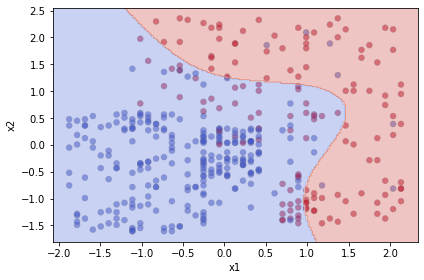

Kernel: sigmoid
Score:  0.6893939393939394


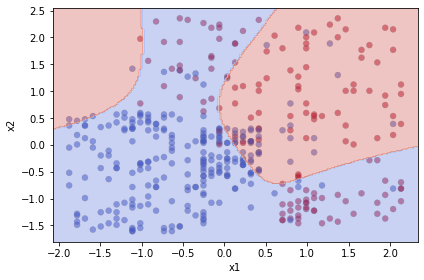

In [110]:
kernel_list = ['rbf', 'poly', 'sigmoid']
for k in kernel_list:
    print('Kernel:',k)
    modelo = SVC(kernel=k)
    modelo.fit(X_train_s,y_train)
    print('Score: ',modelo.score(X_test_s,y_test))
    graficar_fronteras(modelo)

Kernel: rbf  y un gama de  0.001
Score:  0.6060606060606061


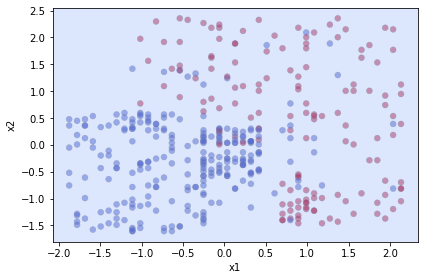

Kernel: rbf  y un gama de  0.0064444444444444445
Score:  0.7878787878787878


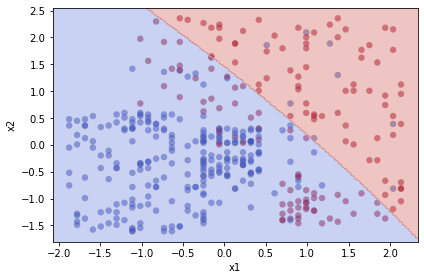

Kernel: rbf  y un gama de  0.01188888888888889
Score:  0.8181818181818182


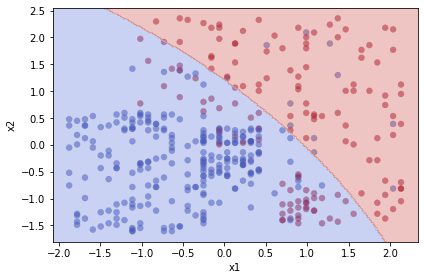

Kernel: rbf  y un gama de  0.017333333333333333
Score:  0.8409090909090909


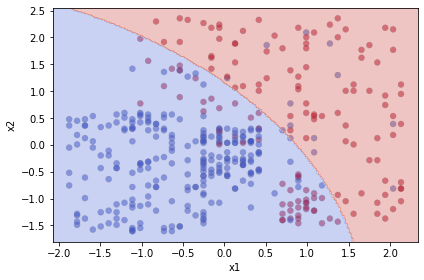

Kernel: rbf  y un gama de  0.02277777777777778
Score:  0.8484848484848485


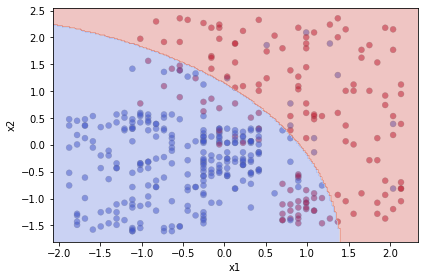

Kernel: rbf  y un gama de  0.028222222222222225
Score:  0.8560606060606061


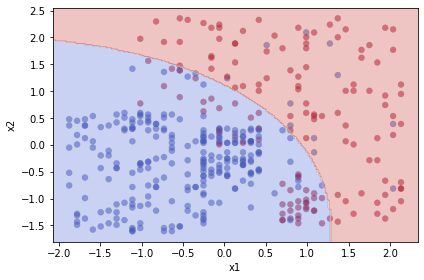

Kernel: rbf  y un gama de  0.033666666666666664
Score:  0.8636363636363636


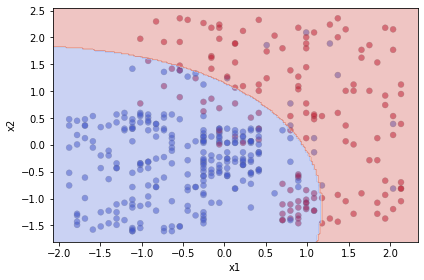

Kernel: rbf  y un gama de  0.03911111111111111
Score:  0.8636363636363636


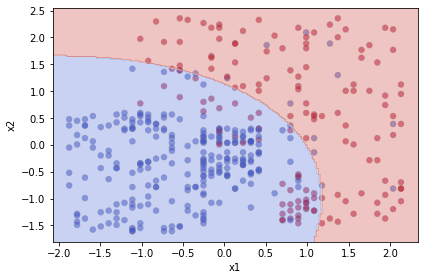

Kernel: rbf  y un gama de  0.04455555555555556
Score:  0.8560606060606061


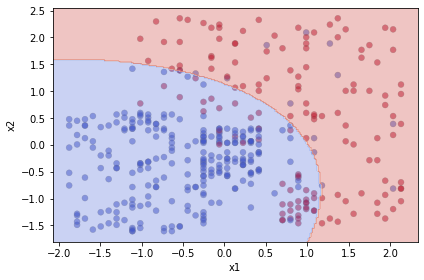

Kernel: rbf  y un gama de  0.05
Score:  0.8560606060606061


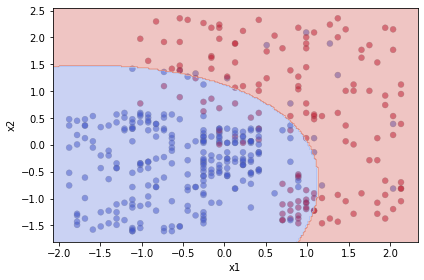

In [56]:
kernel_list = 'rbf'
gamma = np.linspace(0.001,0.05,num=10)
for g in gamma:
    print('Kernel:',kernel_list,' y un gama de ',g)
    modelo = SVC(kernel=kernel_list,gamma=g)
    modelo.fit(X_train_s,y_train)
    print('Score: ',modelo.score(X_test_s,y_test))
    graficar_fronteras(modelo)

Kernel: rbf  y un gama de  auto C de  0.02
Score:  0.6060606060606061


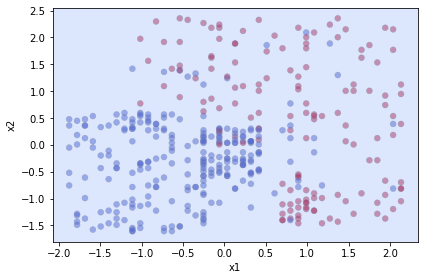

Kernel: rbf  y un gama de  auto C de  0.07333333333333333
Score:  0.9166666666666666


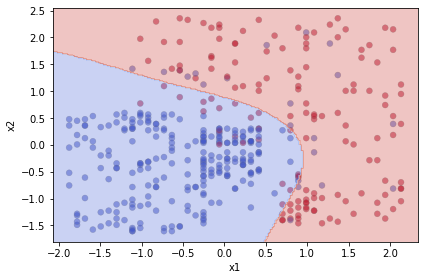

Kernel: rbf  y un gama de  auto C de  0.12666666666666665
Score:  0.9393939393939394


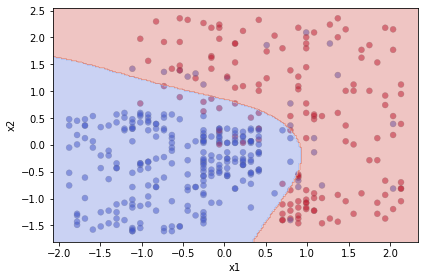

Kernel: rbf  y un gama de  auto C de  0.17999999999999997
Score:  0.9393939393939394


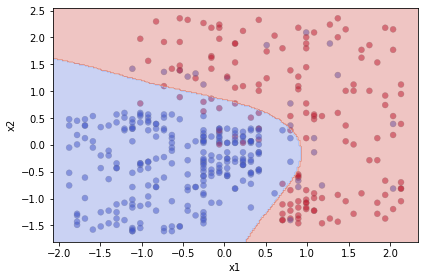

Kernel: rbf  y un gama de  auto C de  0.2333333333333333
Score:  0.946969696969697


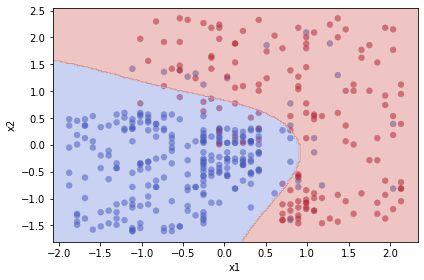

Kernel: rbf  y un gama de  auto C de  0.2866666666666667
Score:  0.946969696969697


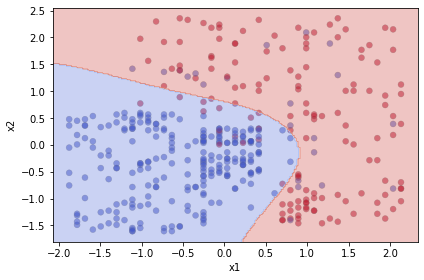

Kernel: rbf  y un gama de  auto C de  0.33999999999999997
Score:  0.9545454545454546


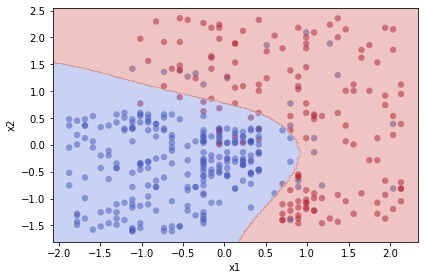

Kernel: rbf  y un gama de  auto C de  0.3933333333333333
Score:  0.9545454545454546


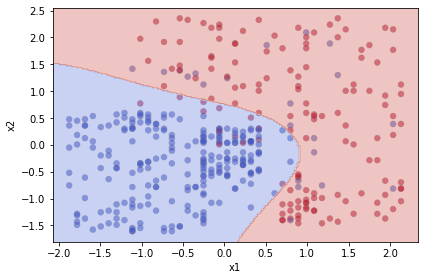

Kernel: rbf  y un gama de  auto C de  0.44666666666666666
Score:  0.9545454545454546


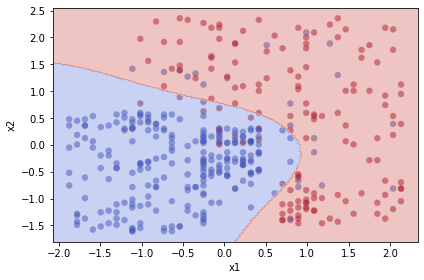

Kernel: rbf  y un gama de  auto C de  0.5
Score:  0.9545454545454546


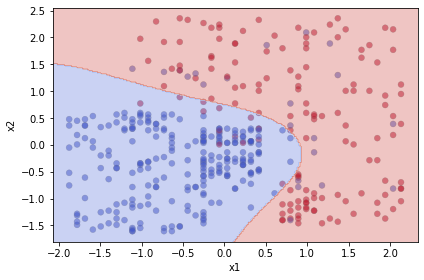

In [109]:
kernel_list = 'rbf'
gamma = 'auto'
c = np.linspace(0.02,0.5,10,dtype='float')
for c_l in c:
    print('Kernel:',kernel_list,' y un gama de ',gamma, 'C de ', c_l)
    modelo = SVC(kernel=kernel_list,gamma=gamma,C=c_l)
    modelo.fit(X_train_s,y_train)
    print('Score: ',modelo.score(X_test_s,y_test))
    graficar_fronteras(modelo)

In [103]:
c

array([  0.        ,  11.11111111,  22.22222222,  33.33333333,
        44.44444444,  55.55555556,  66.66666667,  77.77777778,
        88.88888889, 100.        ])

## 2. Manos a la obra: Kernel + SVM

En base a todo lo visto en anteriormente, vamos a aplicar SVM al dataset `DS_Clase_04_iris.csv` ¿Cuantas clases tiene este dataset? ¿Es un problema multiclase? 

**Para investigar:** ¿Qué función cumple el parámetro `decision_function_shape` de la función SVC de scikit-learn?

**Ejercicios:**

1. Implementa 3 clasificadores SVM con Kernels: `Polinómico`, `Gaussiano` y `Sigmoide`
2. Realiza la matriz de confusión y el reporte de clasificación para cada kernel.
3. ¿Qué Kernel produce los mejores resultados?


`Tip:` Utilizando el código visto al comienzo de la notebook, podés crear funciones que te permitan graficar la matriz de confusión y los límites de clasificación, sin tener que copiar y pegar todo el código.

In [71]:
iris = pd.read_csv('../datasets/DS_Bitácora_04_Iris.csv')

In [72]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [73]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [74]:
X = iris.drop(['Id','Species'],axis=1)
y = iris['Species']

In [77]:
scaler = StandardScaler()
X_s = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.33, random_state=42)

In [86]:
# Gaussiano = rbf
kernel_list = ['rbf', 'poly', 'sigmoid']
for k in kernel_list:
    print('Kernel:',k)
    print('\n')
    modelo = SVC(kernel=k)
    modelo.fit(X_train,y_train)
    test_predict = modelo.predict(X_test)
    print(confusion_matrix(y_test,test_predict))
    print(classification_report(y_test,test_predict))
    print('\nScore: ',modelo.score(X_test,y_test))
    print('------------------------\n\n')

Kernel: rbf


[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.94      0.97        16

       accuracy                           0.98        50
      macro avg       0.98      0.98      0.98        50
   weighted avg       0.98      0.98      0.98        50


Score:  0.98
------------------------


Kernel: poly


[[19  0  0]
 [ 0 15  0]
 [ 0  3 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.83      1.00      0.91        15
 Iris-virginica       1.00      0.81      0.90        16

       accuracy                           0.94        50
      macro avg       0.94      0.94      0.94        50
   weighted avg       0.95      0.94      0.94        50


Score:  0.94
------------------------


Kernel: sig

In [88]:
modelo.decision_function_shape()

'ovr'